# **Importing Libaries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow_hub as hub
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,SpatialDropout2D,Dropout,LeakyReLU
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
     #   print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# **Importing Training and Test Data**

In [2]:
img_angry=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/angry/*.jpg')])
img_disgust=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/disgust/*.jpg')])
img_fear=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/fear/*.jpg')])
img_happy=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/happy/*.jpg')])
img_neutral=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/neutral/*.jpg')])
img_sad=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/sad/*.jpg')])
img_surprise=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/train/surprise/*.jpg')])

In [3]:
y_angry=np.zeros((img_angry.shape[0],1))
y_disgust=np.zeros((img_disgust.shape[0],1))+1
y_fear=np.zeros((img_fear.shape[0],1))+2
y_happy=np.zeros((img_happy.shape[0],1))+3
y_neutral=np.zeros((img_neutral.shape[0],1))+4
y_sad=np.zeros((img_sad.shape[0],1))+5
y_surprise=np.zeros((img_surprise.shape[0],1))+6

In [4]:
test_angry=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/angry/*.jpg')])
test_disgust=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/disgust/*.jpg')])
test_fear=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/fear/*.jpg')])
test_happy=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/happy/*.jpg')])
test_neutral=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/neutral/*.jpg')])
test_sad=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/sad/*.jpg')])
test_surprise=np.array([mpimg.imread(file) for file in glob.glob('/kaggle/input/facial-emotion-expressions/images/validation/surprise/*.jpg')])

In [5]:
y_angry_test=np.zeros((test_angry.shape[0],1))
y_disgust_test=np.zeros((test_disgust.shape[0],1))+1
y_fear_test=np.zeros((test_fear.shape[0],1))+2
y_happy_test=np.zeros((test_happy.shape[0],1))+3
y_neutral_test=np.zeros((test_neutral.shape[0],1))+4
y_sad_test=np.zeros((test_sad.shape[0],1))+5
y_surprise_test=np.zeros((test_surprise.shape[0],1))+6

In [6]:
X_train=np.concatenate([img_angry,img_disgust,img_fear,img_happy,img_neutral,img_sad,img_surprise])/255
y_train=pd.DataFrame(np.concatenate([y_angry,y_disgust,y_fear,y_happy,y_neutral,y_sad,y_surprise]),columns=['class'])

In [7]:
X_test=np.concatenate([test_angry,test_disgust,test_fear,test_happy,test_neutral,test_sad,test_surprise])/255
y_test=pd.DataFrame(np.concatenate([y_angry_test,y_disgust_test,y_fear_test,y_happy_test,y_neutral_test,y_sad_test,y_surprise_test]),columns=['class'])

<font size="3.4">In order to train the model here, the output labels are changed from integer labelling to one-hot labelling and the training data is shuffled so as to randomize the order of the training data so that no bias of order is there on the dropout layer of the model

In [8]:
X_train=X_train.reshape((-1,48,48,1))
X_test=X_test.reshape((-1,48,48,1))
y_train_hot=np.array(pd.get_dummies(y_train['class']))
y_test_hot=np.array(pd.get_dummies(y_test['class']))
X_train,y_train_hot=shuffle(X_train,y_train_hot)
X_test,y_test_hot=shuffle(X_test,y_test_hot)
print(X_train.shape)
print(y_train_hot.shape)
print(X_test.shape)
print(y_test_hot.shape)
print(y_train_hot[0])

(28821, 48, 48, 1)
(28821, 7)
(7066, 48, 48, 1)
(7066, 7)
[0 1 0 0 0 0 0]


# Data Visualization

<font size="3.4"> Below Function is to map the 1-hot encoded labels to emotions

In [9]:
def emot(arr):
    x=np.argmax(arr)
    if(x==0):
        return str("anger")
    elif(x==1):
        return str("disgust")
    elif(x==2):
        return str("fear")
    elif(x==3):
        return str("happy")
    elif(x==4):
        return str("neutral")
    elif(x==5):
        return str("sad")
    elif(x==6):
        return str("surprise")


### Visualizing a few Training Images

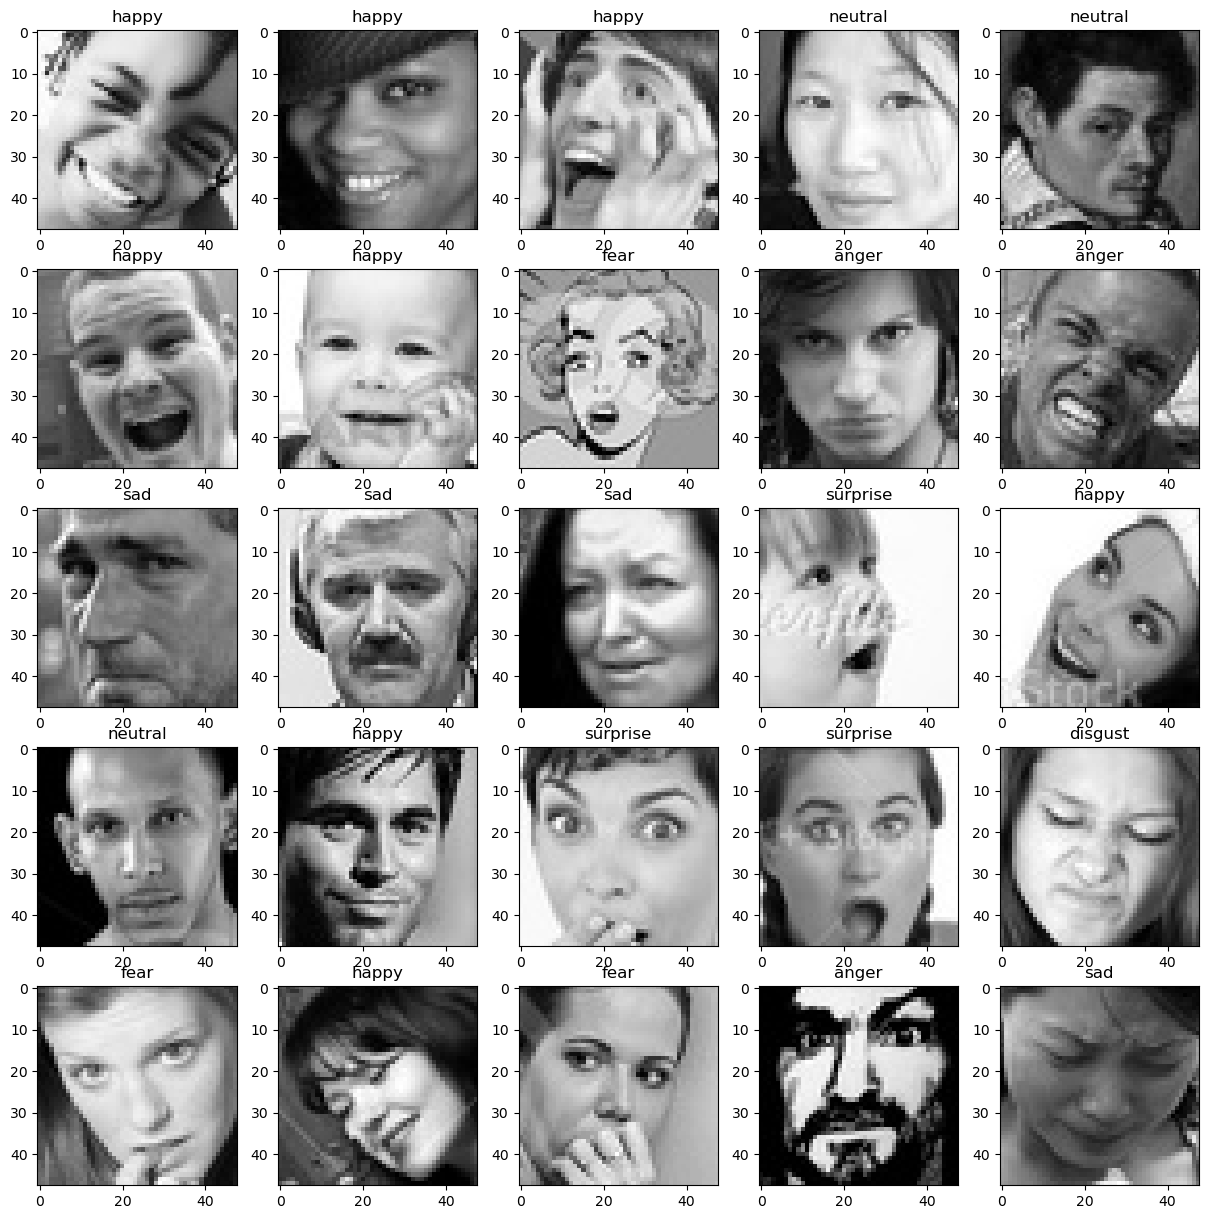

In [10]:
c=np.random.randint(X_train.shape[0]-1,size=(1,25))
h=y_train_hot[c[0,:]]
x=[]
for i in range(h.shape[0]):
    x.append(emot(h[i]))
plt.subplots(5,5,figsize=(15,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[c[0,i-1]],cmap="gray")
    plt.title(x[i-1])


### Visualizing a few Test Images

['sad', 'happy', 'happy', 'fear', 'anger', 'anger', 'happy', 'fear', 'fear', 'neutral', 'surprise', 'happy', 'happy', 'sad', 'anger', 'fear', 'happy', 'neutral', 'fear', 'disgust', 'anger', 'happy', 'neutral', 'happy', 'happy']


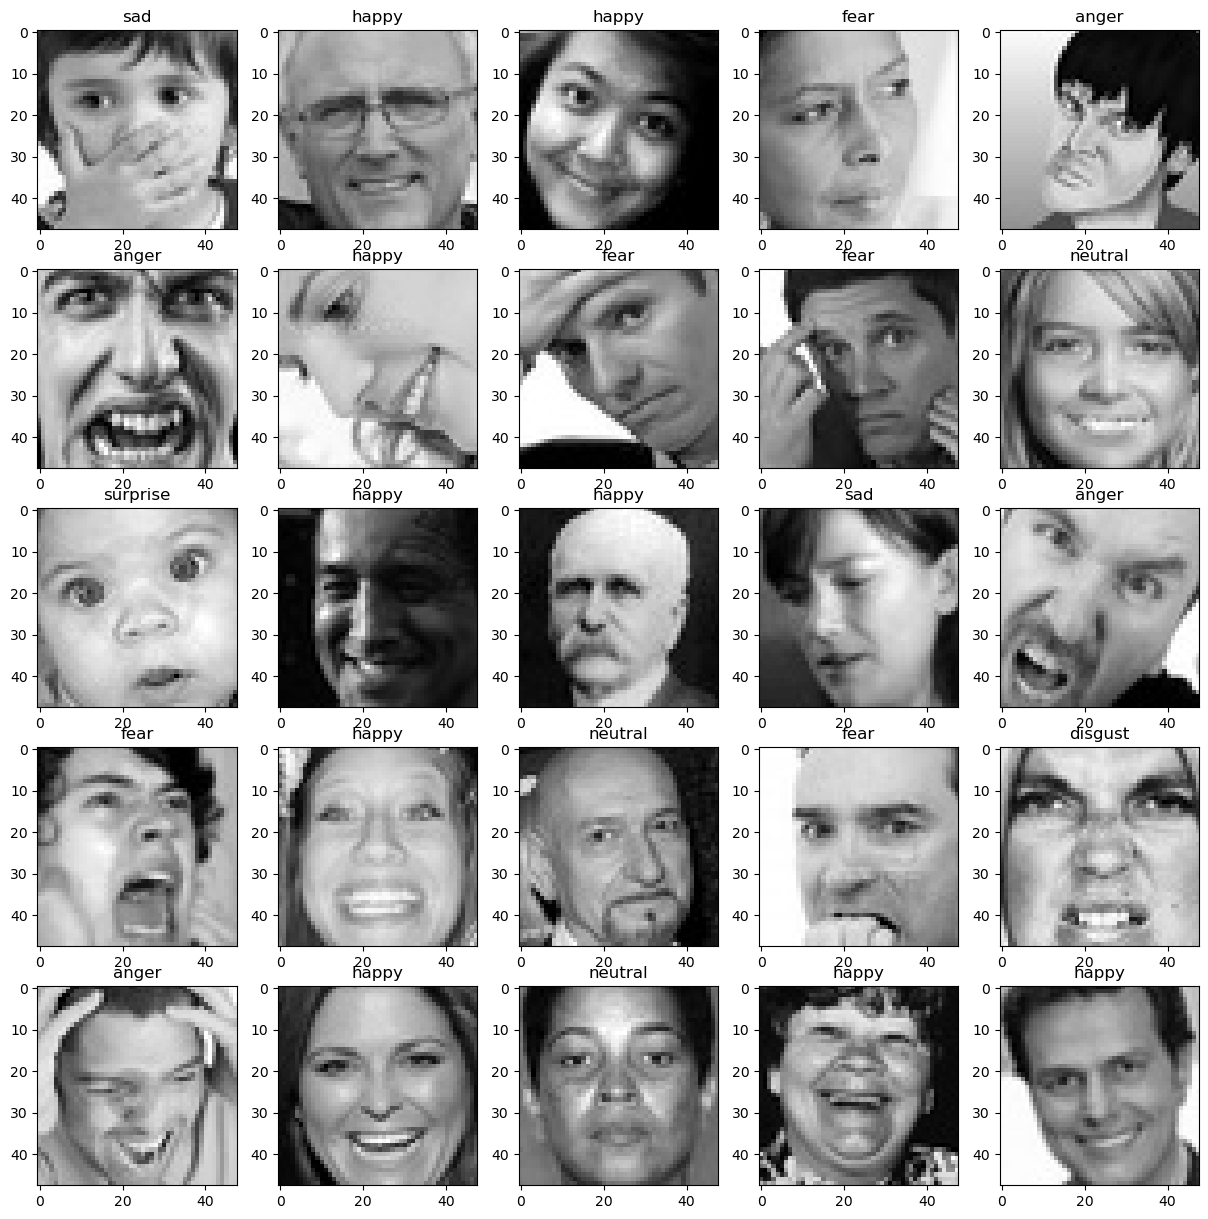

In [12]:
c=np.random.randint(X_test.shape[0]-1,size=(1,25))
h_t=y_test_hot[c[0,:]]
x_t=[]
for i in range(h_t.shape[0]):
    x_t.append(emot(h_t[i]))
print(x_t)
plt.subplots(5,5,figsize=(15,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test[c[0,i-1]],cmap="gray")
    plt.title(x_t[i-1])

# Training the Model

<font size="3.4">Here I have trained a Convolutional Neural Network for predicting the emotion of the person in the image

In [47]:
    model=tf.keras.Sequential()
    model.add(Conv2D(32,(5,5),activation='relu',input_shape=(48,48,1),padding='same'))
    model.add(MaxPooling2D(pool_size=(2,1)))
    model.add(Conv2D(64,(5,5),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(1,2)))
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,1)))
    model.add(Conv2D(196,(3,3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(1,2)))
    model.add(Conv2D(250,(2,2),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,1)))
    model.add(Conv2D(300,(2,1),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(1,2)))
    model.add(Conv2D(600,(1,2),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.35))
    model.add(Dense(units=20,activation='relu'))
    model.add(Dense(units=12,activation='relu'))
    model.add(Dense(units=7,activation='linear'))
    model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 48, 48, 32)        832       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 24, 48, 64)        51264     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 12, 24, 128)     

In [48]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(0.00012))
history=model.fit(X_train,y_train_hot,validation_data=(X_test,y_test_hot),epochs=17)

Epoch 1/17
901/901 [==============================] - 18s 16ms/step - loss: 1.8220 - val_loss: 1.7306
Epoch 2/17
901/901 [==============================] - 15s 16ms/step - loss: 1.6639 - val_loss: 1.5772
Epoch 3/17
901/901 [==============================] - 15s 16ms/step - loss: 1.5205 - val_loss: 1.4377
Epoch 4/17
901/901 [==============================] - 15s 16ms/step - loss: 1.4243 - val_loss: 1.3824
Epoch 5/17
901/901 [==============================] - 14s 16ms/step - loss: 1.3534 - val_loss: 1.3369
Epoch 6/17
901/901 [==============================] - 14s 16ms/step - loss: 1.3012 - val_loss: 1.2940
Epoch 7/17
901/901 [==============================] - 14s 16ms/step - loss: 1.2508 - val_loss: 1.2735
Epoch 8/17
901/901 [==============================] - 15s 16ms/step - loss: 1.2020 - val_loss: 1.2479
Epoch 9/17
901/901 [==============================] - 15s 16ms/step - loss: 1.1663 - val_loss: 1.2136
Epoch 10/17
901/901 [==============================] - 15s 16ms/step - loss: 1.122

In [49]:
pred=tf.nn.softmax(model.predict(X_train))
pred=np.argmax(pred,axis=1)
print(pred)

901/901 [==============================] - 4s 4ms/step
[1 3 3 ... 2 3 2]


In [50]:
y_train=np.argmax(y_train_hot,axis=1)
y_test=np.argmax(y_test_hot,axis=1)

In [51]:
accuracy_score(pred,y_train)

0.7671489538877901

In [52]:
confusion_matrix(y_train,pred)

array([[2694,    6,  528,   55,  220,  364,  126],
       [ 116,   45,  246,    0,    6,   21,    2],
       [ 234,    1, 3081,   49,  182,  371,  185],
       [  47,    0,  209, 6484,  176,  185,   63],
       [ 187,    0,  465,  198, 3692,  387,   53],
       [ 274,    0,  843,  110,  361, 3323,   27],
       [ 100,    0,  217,   56,   35,    6, 2791]])

In [53]:
pred_test=tf.nn.softmax(model.predict(X_test))
pred_test=np.argmax(pred_test,axis=1)
pred_test.reshape(-1,1)

221/221 [==============================] - 1s 5ms/step


array([[2],
       [4],
       [3],
       ...,
       [0],
       [2],
       [2]])

In [54]:
print(accuracy_score(pred_test,y_test))


0.574157939428248


<font size="3.4">Below function is to map the integer encoded data to the emotion

In [55]:
def emot_pred(x):
    if(x==0):
        return str("anger")
    elif(x==1):
        return str("disgust")
    elif(x==2):
        return str("fear")
    elif(x==3):
        return str("happy")
    elif(x==4):
        return str("neutral")
    elif(x==5):
        return str("sad")
    elif(x==6):
        return str("surprise")
    

### Visualizing the predictions of 'model'

['fear', 'sad', 'happy', 'neutral', 'sad', 'fear', 'sad', 'neutral', 'fear', 'happy', 'neutral', 'happy', 'fear', 'happy', 'neutral', 'anger', 'fear', 'fear', 'anger', 'happy', 'anger', 'fear', 'neutral', 'sad', 'surprise']


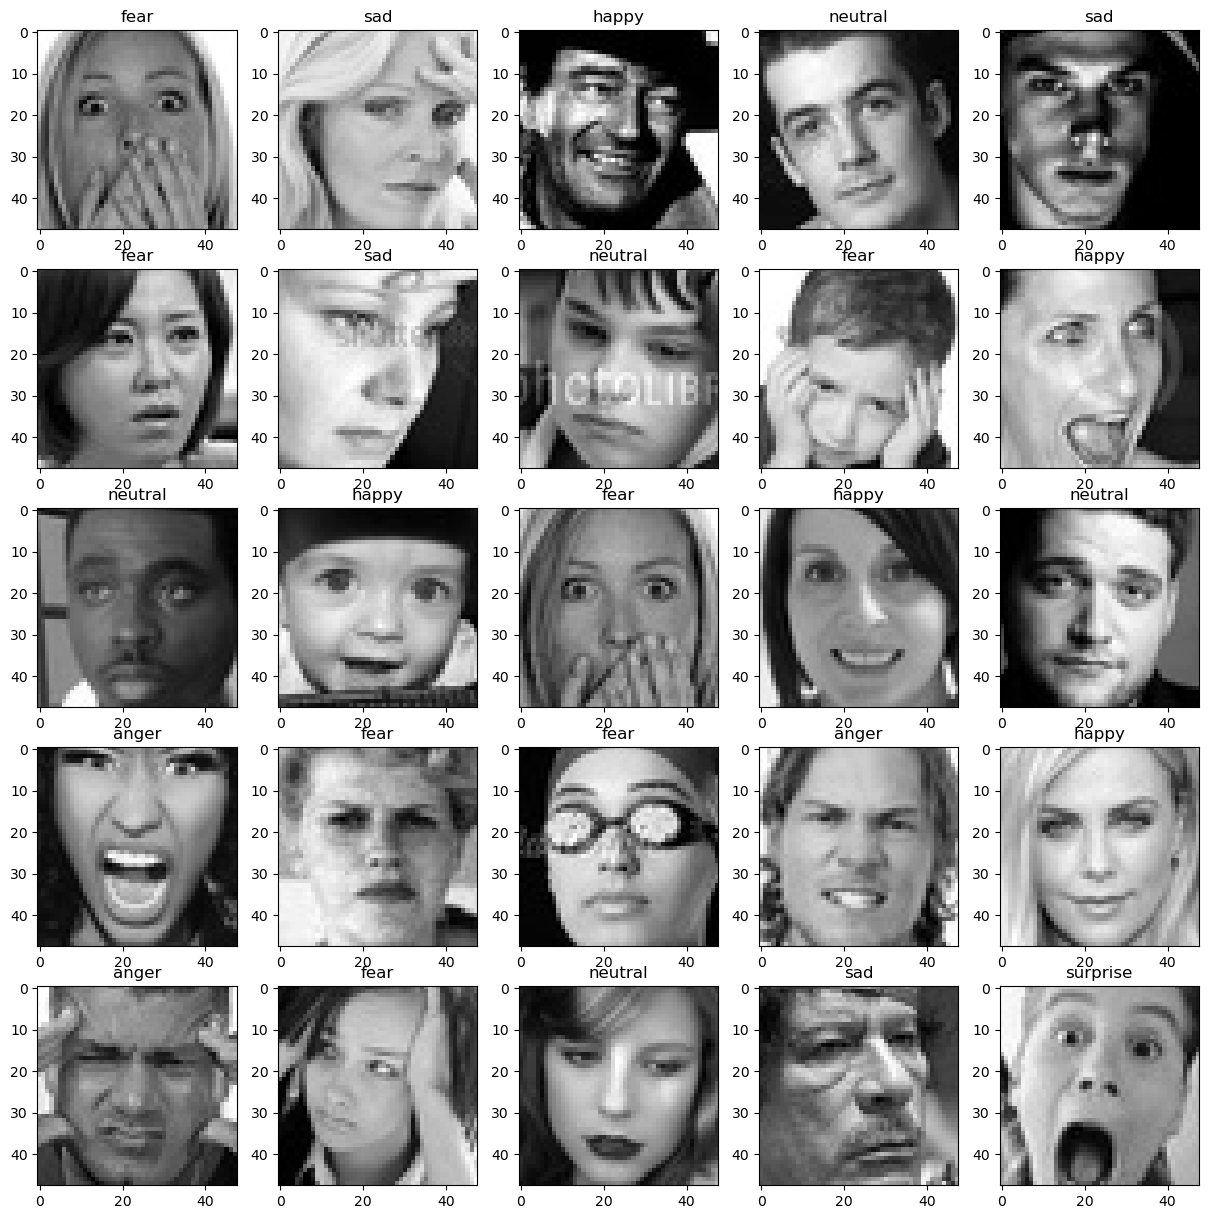

In [56]:
c_ver=np.random.randint(X_test.shape[0]-1,size=(1,25))
h_t_pred=pred_test[c_ver[0,:]]
x_t_pred=[]
for i in range(h_t_pred.shape[0]):
    x_t_pred.append(emot_pred(h_t_pred[i]))
print(x_t_pred)
plt.subplots(5,5,figsize=(15,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test[c_ver[0,i-1]],cmap="gray")
    plt.title(x_t_pred[i-1])

In [57]:
confusion_matrix(y_test,pred_test)

array([[ 419,    3,  198,   50,  102,  146,   42],
       [  24,    7,   61,    3,    1,    9,    6],
       [ 122,    0,  527,   32,   84,  154,   99],
       [  52,    0,  125, 1409,   89,  107,   43],
       [ 103,    0,  185,  111,  600,  189,   28],
       [  96,    1,  255,   61,  171,  541,   14],
       [  28,    1,  130,   55,   20,    9,  554]])

<font size="3.4">As we see the above model doesn't have a very good accuracy. In order to imporove the metrics I have trained a few other models on the training set and the below model has the best accuracy metrics of all the models trained:

In [58]:
other_model=tf.keras.models.load_model('/kaggle/input/model6/my_model6.hdf5',compile=False)

In [59]:
other_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 48, 48, 32)        160       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 24, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 48, 64)        12352     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 spatial_dropout2d_12 (Spati  (None, 24, 24, 64)       0         
 alDropout2D)                                                    
                                                     

In [60]:
pred_1=tf.nn.softmax(other_model.predict(X_train))


901/901 [==============================] - 5s 5ms/step


In [61]:
pred=np.argmax(pred_1,axis=1)
print(pred)

[0 3 3 ... 4 3 5]


In [62]:
y_train=np.argmax(y_train_hot,axis=1)
y_test=np.argmax(y_test_hot,axis=1)
accuracy_score(pred,y_train)

0.8369244647999723

In [63]:
confusion_matrix(y_train,pred)

array([[3070,    4,  142,   33,  348,  370,   26],
       [  45,  302,   27,    5,   35,   21,    1],
       [ 249,    6, 2695,   40,  359,  477,  277],
       [  37,    0,   31, 6816,  176,   50,   54],
       [  86,    0,   77,  125, 4478,  209,    7],
       [ 210,    0,  202,   45,  593, 3873,   15],
       [  32,    1,  146,   58,   66,   15, 2887]])

In [64]:
pred_test_1=tf.nn.softmax(other_model.predict(X_test))


221/221 [==============================] - 1s 6ms/step


In [65]:
pred_test=np.argmax(pred_test_1,axis=1)
accuracy_score(pred_test,y_test)

0.6218511180300028

### Visualizing the Prediction of 'other_model'

['sad', 'happy', 'neutral', 'surprise', 'neutral', 'neutral', 'sad', 'sad', 'happy', 'happy', 'anger', 'fear', 'fear', 'happy', 'anger', 'fear', 'fear', 'fear', 'happy', 'surprise', 'sad', 'neutral', 'sad', 'anger', 'sad']


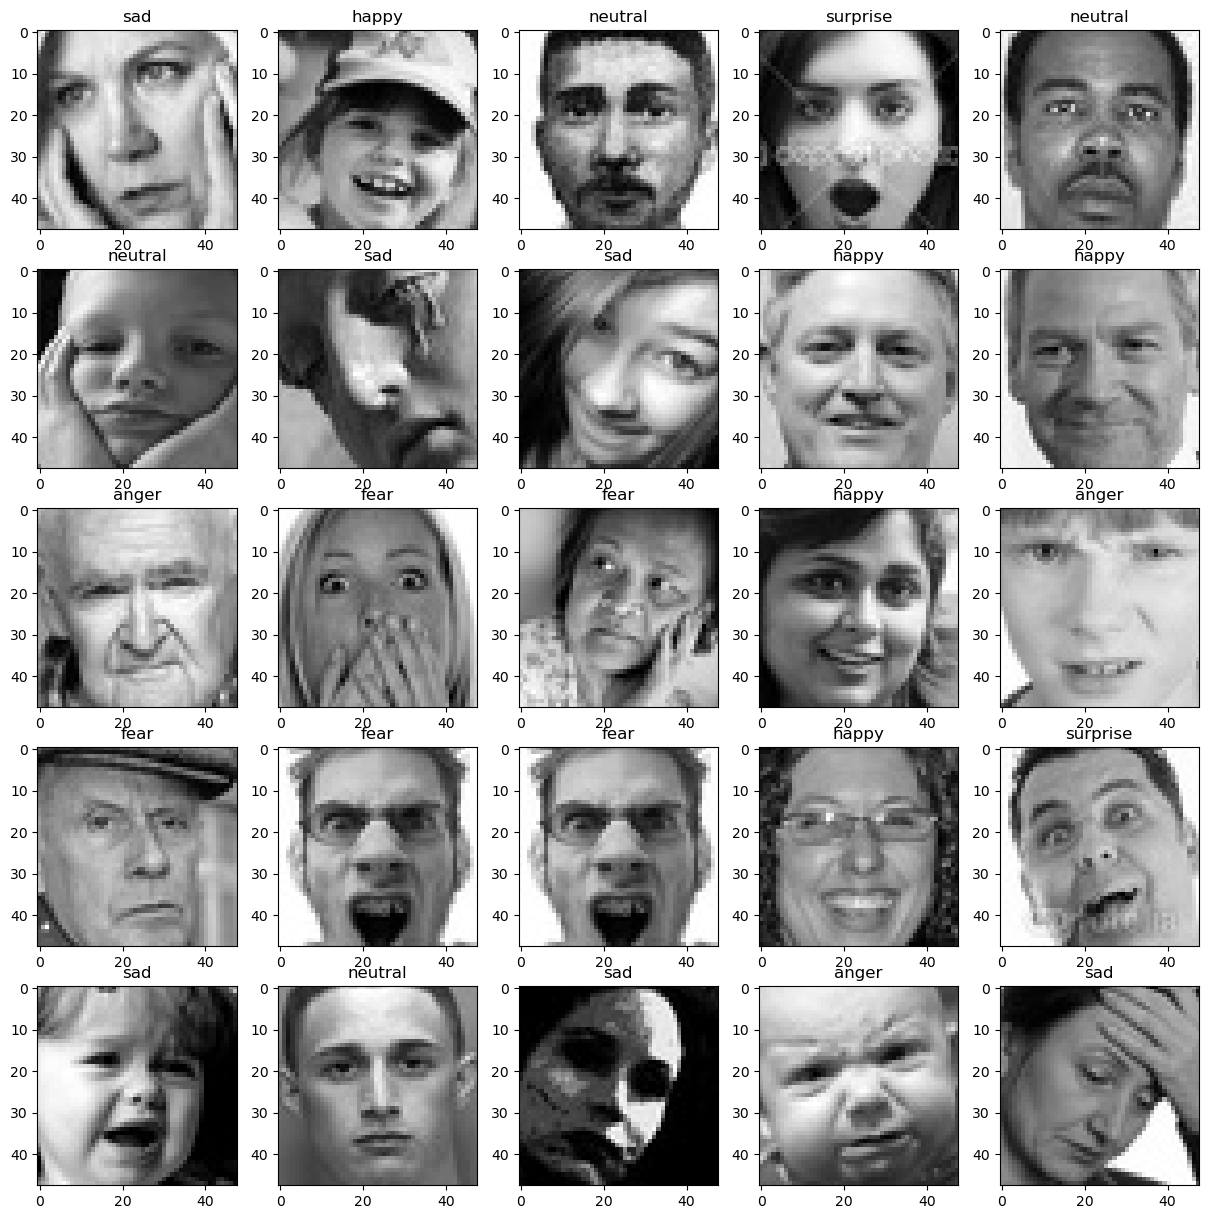

In [66]:
c_ver=np.random.randint(X_test.shape[0]-1,size=(1,25))
h_t_pred=pred_test[c_ver[0,:]]
x_t_pred=[]
for i in range(h_t_pred.shape[0]):
    x_t_pred.append(emot_pred(h_t_pred[i]))
print(x_t_pred)
plt.subplots(5,5,figsize=(15,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test[c_ver[0,i-1]],cmap="gray")
    plt.title(x_t_pred[i-1])

In [67]:
confusion_matrix(y_test,pred_test)

array([[ 493,    2,   89,   60,  170,  126,   20],
       [  23,   51,   12,    3,   10,   10,    2],
       [ 133,    2,  388,   34,  177,  196,   88],
       [  70,    3,   38, 1475,  134,   76,   29],
       [  68,    1,   57,   92,  814,  168,   16],
       [ 102,    0,  112,   59,  281,  571,   14],
       [  20,    1,   73,   43,   44,   14,  602]])

# Conclusion 

As human emotion is a subjective term and someone may show multiple emotions at the same time, there is significant error in the model as training data has a single label. 

The major cause of misclassification here is due to the multiple similar emotions of people in the photos which as presented as a single emotion(eg-A person usually shows Sadness and Fear simultaneously, hence the algorithm struggles with differentiating the two).This claim can be verified by looking at the confusion matrices

Hence a relatively better metric for this data would be that whether the either of the two most prominent emotions are a correct classification.The code for it is implemented below

In [68]:
def first_two_accuracy(y_train,pred_softmax):
    x=np.argsort(pred_softmax,axis=1)
    y=x[:,5:7]
    t=y-(y_train.reshape(-1,1))
    p=t[:,0]*t[:,1]
    p[p!=0]=1
    acc=np.sum(p)/p.shape[0]
    return 1-acc

In [69]:
first_two_accuracy(y_train,pred_1)

0.9447971964886714

In [70]:
first_two_accuracy(y_test,pred_test_1)

0.7887064817435607